<a href="https://colab.research.google.com/github/RegaipKURT/Machine-Learning-Python/blob/master/Arima_vs_YSA_Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip3 install arch pmdarima
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-04-03 00:30:39--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-04-03 00:30:39 (67.0 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model

sns.set()

In [0]:
veri = pd.read_csv("airline-passengers.csv")
veri.index = pd.to_datetime(veri["Month"])
del veri["Month"]

In [73]:
print(veri.head())
print(veri.tail())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


In [0]:
train, test =  sklearn.model_selection.train_test_split(veri, test_size = 0.2, shuffle=False)

In [75]:
print(train.tail(), train.shape)
print(test.head(), test.shape)

            Passengers
Month                 
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491 (115, 1)
            Passengers
Month                 
1958-08-01         505
1958-09-01         404
1958-10-01         359
1958-11-01         310
1958-12-01         337 (29, 1)


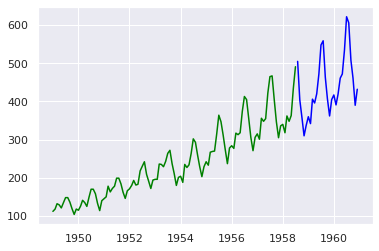

In [76]:
plt.plot(train, color="green")
plt.plot(test, color="blue")
plt.show()

In [77]:
model = SARIMAX(train["Passengers"], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
tahmin = model.forecast(steps=test.shape[0])

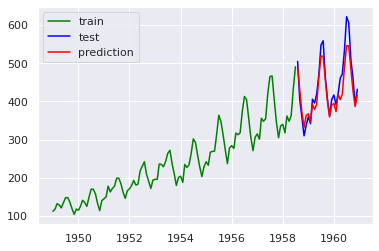

In [79]:
plt.plot(train, color="green", label="train")
plt.plot(test, color="blue", label="test")
plt.plot(tahmin, color ="red", label="prediction")
plt.legend()
plt.show()

In [80]:
train["index2"] = list(range(1, len(train)+1))
test["index2"] = list(range(len(train)+1, len(train)+len(test)+1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras import callbacks

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="RMSprop", loss="mean_absolute_error", metrics=["mse"])

class myCB(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_loss") < 55.5:
            print("İstenilen Seviyeye Ulaşıldı... Loss: {} Durduruluyor!".format(logs.get("val_loss")))
            print("Toplam Epoch Sayısı: " +  str(epoch))
            self.model.stop_training = True

cb = myCB()
model.fit(train.index2, train["Passengers"], epochs=250, callbacks=[cb], verbose=0, validation_data=(test.index2, test["Passengers"]))
tahmin_ysa = model.predict(test.index2)

İstenilen Seviyeye Ulaşıldı... Loss: 55.3138542175293 Durduruluyor!
Toplam Epoch Sayısı: 28


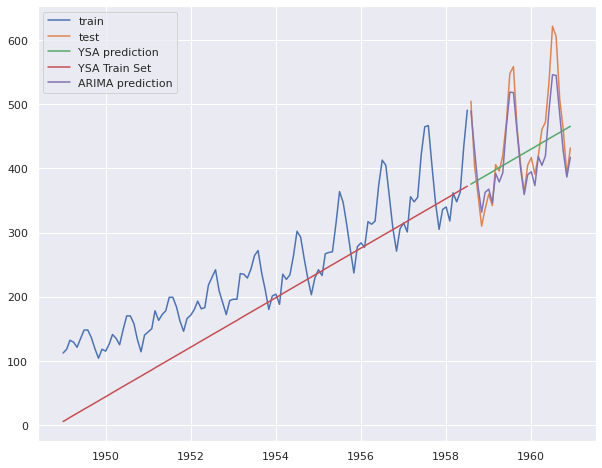

In [218]:
tahmin_ysa = pd.DataFrame(data=tahmin_ysa, index=test.index, columns=[veri.columns[0]])
act = model.predict(train.index2)
act_ysa = pd.DataFrame(data=act, index=train.index, columns=[veri.columns[0]])
plt.figure(figsize=(10, 8))
plt.plot(train.Passengers, label="train")
plt.plot(test.Passengers, label="test")
plt.plot(tahmin_ysa, label= "YSA prediction")
plt.plot(act_ysa, label="YSA Train Set")
plt.plot(tahmin, label="ARIMA prediction")
plt.legend()
plt.plot()
plt.legend()
plt.show()

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Yapay Sinir Ağı MSE:", mean_squared_error(test.Passengers, tahmin_ysa.Passengers))
print("ARIMA MSE:", mean_squared_error(test.Passengers, tahmin))

print("\nYapay Sinir Ağı MAE:", mean_absolute_error(test.Passengers, tahmin_ysa.Passengers))
print("ARIMA MAE:", (mean_absolute_error(test.Passengers, tahmin)))

Yapay Sinir Ağı MSE: 5324.3288951710765
ARIMA MSE: 908.5272192045815

Yapay Sinir Ağı MAE: 55.313853296740305
ARIMA MAE: 23.555508834130954
